# CS 109A/AC 209A/STAT 121A Data Science: Homework 5
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 26th, 2016 at 11:59pm

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Vocareum Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW5.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Verify your submission by checking your submission status on Vocareum!**

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

In [1]:
# Clear namespace
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

Import libraries

In [2]:
# Data manipulation
import numpy as np
import pandas as pd
import re

# Ploting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors

# Statistics
import statsmodels.api as sm
from scipy.stats import norm
from collections import Counter

# Machine Learning
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegressionCV as LogRegCV
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import nltk 
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Hagmann, Tim]

### Part (b): Course Number

[CS 109a]

### Part (c): Who did you work with?

[-]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Classification

In this problem, your task is to classify images of handwritten digits. 

The data set is provided in the file `dataset_1.txt` and contains 8x8 gray-scale images of hand-written digits, flattened to a 64-length vector. The last column contains the digit. For simplicity, we have only included digits 0, 1 and 3. 

We want you to build a model that can be given the image of a hand-written digit and correctly classify this digit as 0, 1 or 3.

### Step 1: Read in the data and visualize

In [3]:
#Load the data
data = np.loadtxt('datasets/dataset_1.txt', delimiter=',')

#Split into predictor and response
x = data[:, :-1]
y = data[:, -1]

#Print shapes of predictor and response arrays
print 'predictor matrix shape:', x.shape
print 'response array shape:', y.shape

predictor matrix shape: (543L, 64L)
response array shape: (543L,)


## Visualise the data:

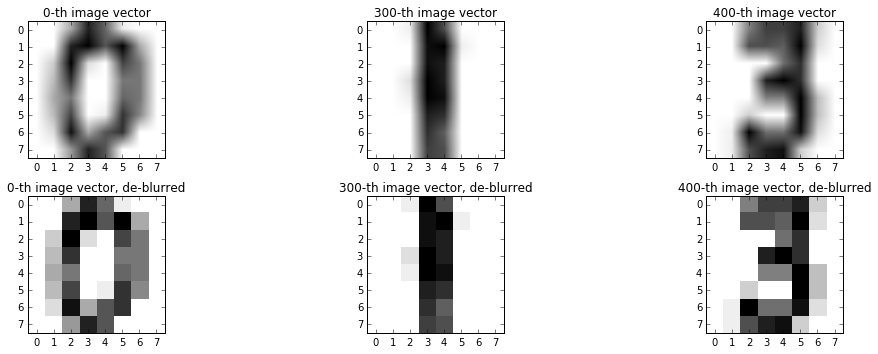

In [4]:
#Plot a couple of images from the dataset
fig, ax = plt.subplots(2, 3, figsize=(15, 5))

#Plot the 0th image vector
ax[0, 0].imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('0-th image vector')

#Plot the 300th image vector
ax[0, 1].imshow(x[300].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('300-th image vector')

#Plot the 400th image vector
ax[0, 2].imshow(x[400].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 2].set_title('400-th image vector')

#Plot the 0th image vector, with de-blurring
ax[1, 0].imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('0-th image vector, de-blurred')

#Plot the 300th image vector, with de-blurring
ax[1, 1].imshow(x[300].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('300-th image vector, de-blurred')

#Plot the 400th image vector, with de-blurring
ax[1, 2].imshow(x[400].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 2].set_title('400-th image vector, de-blurred')

plt.tight_layout()
plt.show()

**Explain why PCA is a better choice for dimension reduction in this problem than step-wise variable selection**

PCA finds the directions of maximum variability in the data. The features in this problem are the individual pixel values and as all pixels contribute to an image PCA is better choice for dimension reduction as the PCA components vectors are a linear combination of all the features instead of simply selecting a subset of the features. In addition, image arrays are high dimensional, and so step-wise variable selection would be computationally very inefficient (have to try very large number of combinations of the variables).  

### Part 1(a).  Reduce the data

Images data are typically high dimensional (the image vector has one feature for every pixel). Thus, to make working with image data more tractible, one might first apply a dimension reduction technique to the data.

- Explain why PCA is a better choice for dimension reduction in this problem than step-wise variable selection.


- Choose the smallest possible number of dimensions for PCA that still permits us to perform classification. 

  (**Hint:** how do we visually verify that subgroups in a dataset are easily classifiable?)


- Visualize and interpret the principal components. Interpret, also, the corresponding PCA varaiable values.

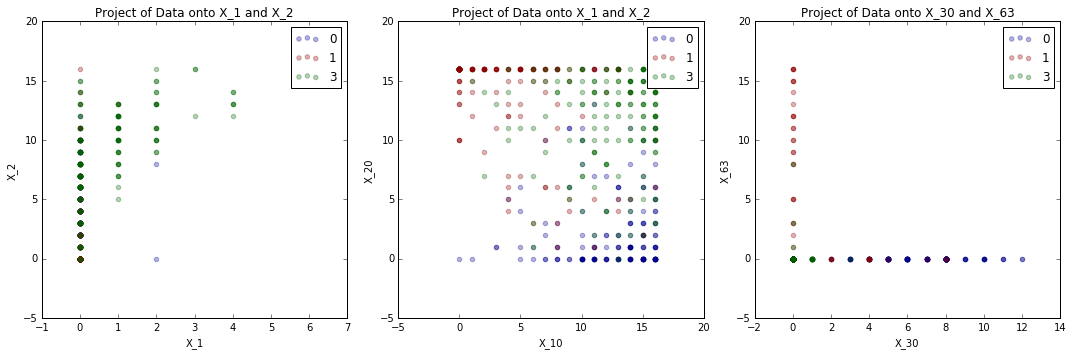

In [5]:
#Let's project the data onto some random 2D planes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
alpha_var = 0.3

#Project onto axes: 1, 2
x_2d = x[:, [1, 2]]

ax[0].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='darkblue', alpha = alpha_var, label='0')
ax[0].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='darkred', alpha = alpha_var, label='1')
ax[0].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='darkgreen', alpha = alpha_var, label='3')

ax[0].set_xlabel('X_1')
ax[0].set_ylabel('X_2')
ax[0].set_title('Project of Data onto X_1 and X_2')
ax[0].legend()

#Project onto axes: 10, 20
x_2d = x[:, [10, 20]]

ax[1].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='darkblue', alpha = alpha_var, label='0')
ax[1].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='darkred', alpha = alpha_var, label='1')
ax[1].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='darkgreen', alpha = alpha_var, label='3')
 
ax[1].set_xlabel('X_10')
ax[1].set_ylabel('X_20')
ax[1].set_title('Project of Data onto X_1 and X_2')
ax[1].legend()


#Project onto axes: 30, 63
x_2d = x[:, [30, -1]]

ax[2].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='darkblue', alpha = alpha_var, label='0')
ax[2].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='darkred', alpha = alpha_var, label='1')
ax[2].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='darkgreen', alpha = alpha_var, label='3')

ax[2].set_xlabel('X_30')
ax[2].set_ylabel('X_63')
ax[2].set_title('Project of Data onto X_30 and X_63')
ax[2].legend()

plt.tight_layout()
plt.show()

Are these projections useful? That is do they reduce the data in a way that makes it possible for us to perform our task?

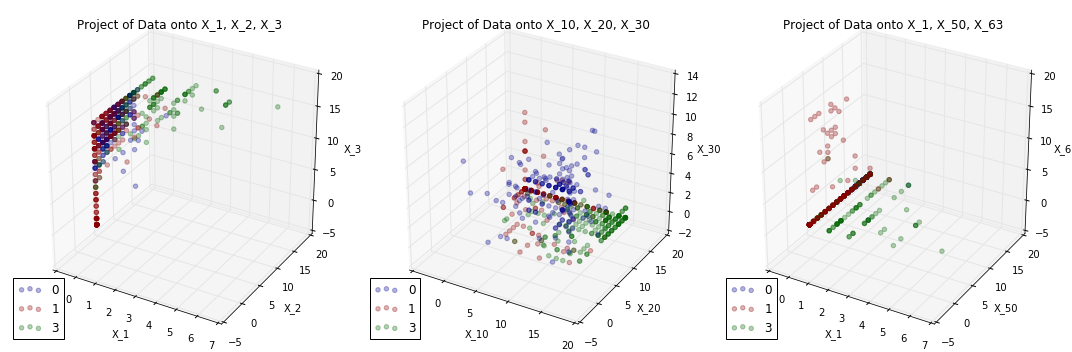

In [6]:
#Let's project the data onto some random 2D planes
fig = plt.figure(figsize=(15, 5))
alpha_var = 0.3

#Project onto axes: 1, 2, 3
x_2d = x[:, [1, 2, 3]]

ax1 = fig.add_subplot(1, 3, 1,  projection='3d')

ax1.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='darkblue', color='darkblue', alpha = alpha_var, label='0')
ax1.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='darkred', color='darkred', alpha = alpha_var, label='1')
ax1.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='darkgreen', color='darkgreen', alpha = alpha_var, label='3')

ax1.set_xlabel('X_1')
ax1.set_ylabel('X_2')
ax1.set_zlabel('X_3')
ax1.set_title('Project of Data onto X_1, X_2, X_3')
ax1.legend(loc='lower left')

#Project onto axes: 10, 20, 30
x_2d = x[:, [10, 20, 30]]

ax2 = fig.add_subplot(1, 3, 2,  projection='3d')

ax2.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='darkblue', color='darkblue', alpha = alpha_var, label='0')
ax2.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='darkred', color='darkred', alpha = alpha_var, label='1')
ax2.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='darkgreen', color='darkgreen', alpha = alpha_var, label='3')

ax2.set_xlabel('X_10')
ax2.set_ylabel('X_20')
ax2.set_zlabel('X_30')
ax2.set_title('Project of Data onto X_10, X_20, X_30')
ax2.legend(loc='lower left')

#Project onto axes: 1, 50, 63
x_2d = x[:, [1, 50, 63]]

ax3 = fig.add_subplot(1, 3, 3,  projection='3d')

ax3.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='darkblue', color='darkblue', alpha = alpha_var, label='0')
ax3.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='darkred', color='darkred', alpha = alpha_var, label='1')
ax3.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='darkgreen', color='darkgreen', alpha = alpha_var, label='3')

ax3.set_xlabel('X_1')
ax3.set_ylabel('X_50')
ax3.set_zlabel('X_63')
ax3.set_title('Project of Data onto X_1, X_50, X_63')
ax3.legend(loc='lower left')

plt.tight_layout()
plt.show()

Are these projections useful? That is do they reduce the data in a way that makes it possible for us to perform our task?

Let's now try reducing the number of dimensions in the data using PCA. Why is PCA a valid technique for dimension reduction? Why is PCA appropriate in the context of our task?

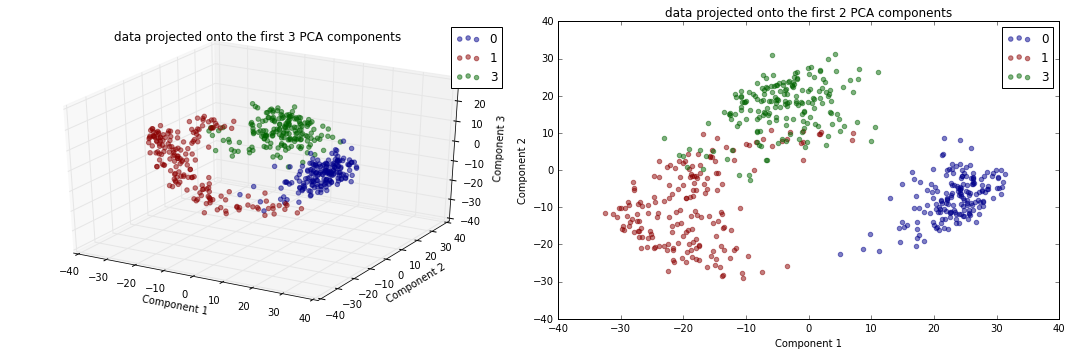

In [7]:
#Apply PCA to data and get the top 3 axes of maximum variation
pca = PCA(n_components=3)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
fig = plt.figure(figsize=(15, 5))
alpha_var = 0.5

ax1 = fig.add_subplot(1, 2, 1,  projection='3d')
ax1.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], x_reduced[y==0, 2], c='darkblue', color='darkblue', alpha = alpha_var, label='0')
ax1.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], x_reduced[y==1, 2], c='darkred', color='darkred', alpha = alpha_var, label='1')
ax1.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], x_reduced[y==3, 2], c='darkgreen', color='darkgreen', alpha = alpha_var, label='3')

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.set_title('data projected onto the first 3 PCA components')
ax1.legend()

#Apply PCA to data and get the top 2 axes of maximum variation
pca = PCA(n_components=2)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], c='darkblue', color='darkblue', alpha = alpha_var, label='0')
ax2.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], c='darkred', color='darkred', alpha = alpha_var, label='1')
ax2.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], c='darkgreen', color='darkgreen', alpha = alpha_var, label='3')

ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_title('data projected onto the first 2 PCA components')
ax2.legend()

plt.tight_layout()
plt.show()

Are the PCA dimension reductions any good? What does a "good" dimension reduction mean in the context of our task? 

Can you interpret the components of the PCA in the context of our application? What is a component of the PCA (in terms of predictors) again?

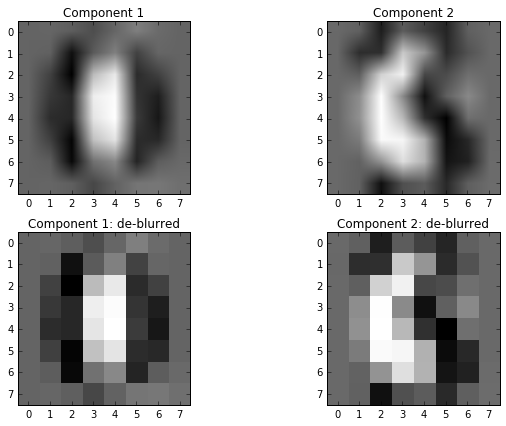

In [8]:
#Display the principal components of PCA as digital images
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
# COMPONENT 1
ax[0, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('Component 1')

# COMPONENT 2
ax[0, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('Component 2')

# COMPONENT 1
ax[1, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('Component 1: de-blurred')

# COMPONENT 2
ax[1, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('Component 2: de-blurred')

plt.tight_layout()
plt.show()

### Part 1(b). Build a classifier

So far, we have only learned models that distinguishes between two classes. Develop and implement a **simple and naive** method of distinguishing between the three digits in our reduced dataset using binary classifiers. 

In [9]:
###Build a classifier to distinguish between 0 and 1

#Remove all instances of class 3
x_binary = x_reduced[y != 3, :]

#Remove all instances of class 3
y_binary = y[y != 3]

#Fit logistic regression model for 0 vs 1
logistic_01 = LogReg()
logistic_01.fit(x_binary, y_binary)

###Build a classifier to distinguish between 1 and 3

#Remove all instances of class 0
x_binary = x_reduced[y != 0, :]

#Remove all instances of class 0
y_binary = y[y != 0]

#Fit logistic regression model for 1 vs 3
logistic_13 = LogReg()
logistic_13.fit(x_binary, y_binary)

###Build a classifier to distinguish between 0 and 3

#Remove all instances of class 1
x_binary = x_reduced[y != 1, :]

#Remove all instances of class 1
y_binary = y[y != 1]

#Fit logistic regression model for 0 vs 3
logistic_03 = LogReg()
logistic_03.fit(x_binary, y_binary)

#Predict a label for our dataset using each binary classifier
y_pred_01 = logistic_01.predict(x_reduced)
y_pred_13 = logistic_13.predict(x_reduced)
y_pred_03 = logistic_03.predict(x_reduced)

#Now, for each image, we have THREE predictions!
#To make a final decision for each image, we just take a majority vote.
n = x_reduced.shape[0]
y_votes = np.zeros((n, 3))

#Votes for 0
y_votes[y_pred_01 == 0, 0] += 1
y_votes[y_pred_03 == 0, 0] += 1

#Votes for 1
y_votes[y_pred_01 == 1, 1] += 1
y_votes[y_pred_13 == 1, 1] += 1

#Votes for 3
y_votes[y_pred_03 == 3, 2] += 1
y_votes[y_pred_13 == 3, 2] += 1

#For each image, label it with the class that get the most votes
y_pred = y_votes.argmax(axis = 1)

#Relabel class 2 as class 3
y_pred[y_pred == 2] = 3

#Accuracy of our predictions
print 'Accuracy of combined model:', np.mean(y == y_pred)

Accuracy of combined model: 0.935543278085


Is this accuracy meaningful? We've already seen cases where high R^2 values can be deeply misleading. Is an high accuracy rate mean we've learned a good classifier? Shouldn't there be a more intuitive way to assess the quality of our classifiers?

### Part 1(c). Build a better one
Asses the quality of your classifier.


- What is the fit (in terms of accuracy or R^2) of your model on the reduced dataset? Visually assess the quality of your classifier by plotting decision surfaces along with the data. Why is visualization of the decision surfaces useful? What does this visualization tell you that a numberical score (like accuracy or R^2) cannot?


- What are the draw backs of your approach to multi-class classification? What aspects of your method is contributing to these draw backs, i.e. why does it fail when it does? 

  (**Hint:** make use your analysis in the above; think about what happens when we have to classify 10 classes, 100 classes)
 
 
- Describe a possibly better alternative for fitting a multi-class model. Specifically address why you expect the alternative model to outperform your model.

  (**Hint:** How does ``sklearn``'s Logistic regression module handle multiclass classification?).

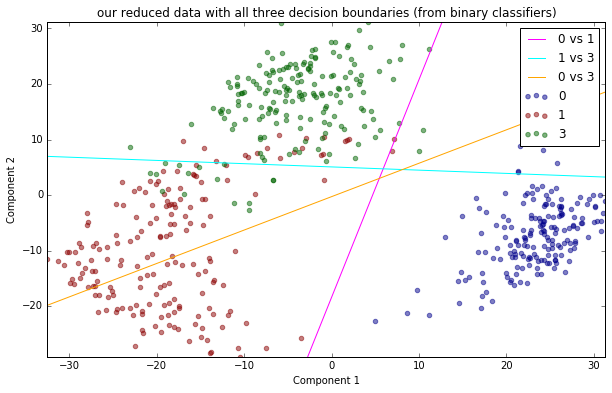

In [10]:
#--------  fit_and_plot_model
# A function to fit a binary LogReg model and visualize it
# Input: 
#      model (LogReg model)
#      ax (axes object for plotting)
#      legend_label (legend label for the plot)

def plot_model(model, ax, legend_label, color):
    #Get the coefficients from logistic regression model
    coef = model.coef_[0]
    intercept = model.intercept_
    
    #Find the max and min horizontal values of our data
    x_0 = np.min(x_reduced[:, 0])
    x_1 = np.max(x_reduced[:, 0])
        
    #Plug int the max and min horizontal values of our data into the equation
    #of the line defined by the coefficients
    y_0 = (-intercept - coef[0] * x_0) / coef[1]
    y_1 = (-intercept - coef[0] * x_1) / coef[1]

    #Plot a line through the pair of points we found above
    ax.plot([x_0, x_1], [y_0, y_1], label=legend_label, color=color)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
alpha_var = 0.5

#Scatter plot of our data
ax.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], color='darkblue', alpha = alpha_var, label='0')
ax.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], color='darkred', alpha = alpha_var, label='1')
ax.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], color='darkgreen', alpha = alpha_var, label='3')

#Plot decision boundaries for 0 vs 1
plot_model(logistic_01, ax, '0 vs 1', 'magenta')
#Plot decision boundaries for 1 vs 3
plot_model(logistic_13, ax, '1 vs 3', 'cyan')
#Plot decision boundaries for 0 vs 3
plot_model(logistic_03, ax, '0 vs 3', 'orange')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_xlim([np.min(x_reduced[:,0]), np.max(x_reduced[:,0])])
ax.set_ylim([np.min(x_reduced[:,1]), np.max(x_reduced[:,1])])
ax.set_title('our reduced data with all three decision boundaries (from binary classifiers)')
ax.legend()
plt.show()

## Problem 2. Sentiment Analysis

In this problem, you will explore how to predict the underlying emotional tone of textual data - this task is called sentiment analysis. 

You will be using the dataset in the file `dataset_2.txt`. In this dataset, there are 1382 posts containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. 

Given a new post about an automobile, your goal is to predict if the sentiment expressed in the new post is positive or negative. For this task you should implement a *regularized* logistic regression model.

Produce a report summarizing your solution to this problem:

- Your report should address all decisions you made in the "Data Science Process" (from Lectures #0, #1, #2):

   a. Data collection & cleaning
   
   b. Data exploration
   
   c. Modeling
   
   d. Analysis  
   
   e. Visualization and presentation  


- Your report should be informative and accessible to a **general audience with no assumed formal training in mathematics, statistics or computer science**.


- The exposition in your report, not including code, visualization and output, should be at least three paragraphs in length (you are free to write more, but you're not required to).

Structure your presentation and exposition like a professional product that can be submitted to a client and or your supervisor at work.

## Introduction 

The goal of this analysis is to build model in order to predict the emotional response based on textual data about Ford automobiles. That means predicting if the expressed sentiment is positive or negative. 


## Functions (necessary for the following calculations)

In [11]:
#--------  extract_words
# A function to extract words from a corpus
# requires
#      re
# Input: 
#      corpus (corpus objec)
def extract_words(corpus):
    import re
    
    # Create array with all the sentences
    whole_text = " ".join(corpus)

    # Extract individual words
    words = re.findall(r'\w+', whole_text.lower())
    return words

#--------  count_words
# A function to count words
# requires:
#      pandas
#      collections
# Input: 
#      words (word array)
#      number_of_words (number of most common words for the output)
def count_words(words, number_of_words):
    common_words = pd.DataFrame(Counter(words).most_common(number_of_words), columns=["word", "frequency"])
    return common_words

#--------  plot_common_words
# Plot histogram of the most common words
# requires:
#      matplotlib
# Input: 
#      common_words (array of the words to plot)
def plot_common_words(common_words):
    
    plt.figure(figsize=(18, 10))
    plt.bar(common_words.index, common_words['frequency'].values, color = "darkblue", alpha = 0.7, edgecolor="white")
    plt.xticks(common_words.index, common_words['word'].values, rotation=90)
    plt.title('Plot I: 100 most common words')
    plt.xlabel('Words'); plt.ylabel('Frequency')
    plt.grid()
    plt.show()


## 1: Importing Data

The data used containts 1'382 postings containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. 

In [12]:
# Load the data
data = pd.read_csv('datasets/dataset_2.txt', sep=',')
print "The first 10 values of the dataset:"
data.head(10)

The first 10 values of the dataset:


,class,text
0,Neg,In 1992 we bought a new Taurus and we really ...
1,Neg,The last business trip I drove to San Franci...
2,Neg,My husband and I purchased a 1990 Ford F250 a...
3,Neg,I feel I have a thorough opinion of this truc...
4,Neg,AS a mother of 3 all of whom are still in ca...
5,Neg,The Ford Winstar is a car that I would not re...
6,Neg,We bought this van in 1999 after having been...
7,Neg,I bought the Focus wagon for it s cargo space...
8,Neg,You ve probably heard about the giant 2000 Fo...
9,Neg,If you thought that the GMC Chevrolet Suburba...


## 2: Data exploration

The next step is exploring the data at hand. That means exploring the number of unique words in the corpus (entire set of reviews) and the counts of each word. In order to do that the paragraphs have to be transformed into a list containing the counts for each of the words, i.e., extracting the feature. This gives us a way of characterising the words present in each paragraph. 



In [13]:
# Create a corpus variable, i.e., all the articles in the dataset 
corpus = data['text'].values

# Count classes
target_class = Counter(data['class'])

# Print the number of unique words
vectorizer_none = CountVectorizer()
total_words = len(vectorizer_none.fit(corpus).get_feature_names())
print 'Total number of unique words in the corpus: ', total_words
print 'Total number of negativ values: ', target_class.values()[0]
print 'Total number of positive values: ', target_class.values()[1]

Total number of unique words in the corpus:  16730
Total number of negativ values:  691
Total number of positive values:  691


Analysing the data shows that there are 16'730 unique words in the corpus. Furthermore, the distribution of the phares is equaly distributed (50/50), i.e., 691 are postive and 691 are negative.


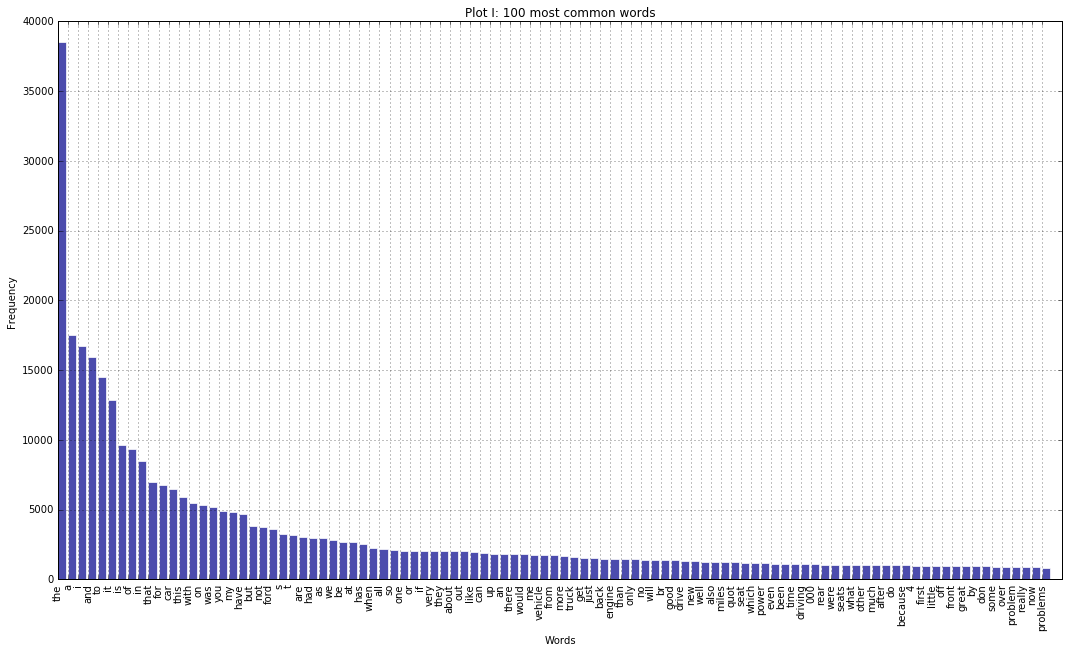

In [14]:
# The corpus is composed of all the articles in the dataset. 
words = extract_words(corpus)
common_words = count_words(words, len(words))
plot_common_words(common_words[0:99])


Visualizing the most frequent words shows, that there are filler words occuring in the dataframe. Those filler or stopwords such as 'the', 'a' etc. are beeing remove as they have no relationship with the sentiment expressed, i.e., they do no contribute to the positivity/negativity of an article. Furthermore, words that occur fewer than 30 time across the entire dataset are also remove. This number is chosen as it can be shown that after a occurence of n>30 the mean distrubtion start approximating a normal distribution. Having words occuring fewer than 30 times either could lead to spurios relationsships or are in the case of n=1 nonsensical. 


## 3: Cleaning the data

In [15]:
# Extract the words
vec_common_words = common_words['word'].values

## Select manually filler words (among the most common words)
filler_words = ['the', 'a', 'i', 'and', 'to', 'it', 'is', 'of', 'in', 'that', 'for', 'this', 'with', 'on', 'was', 'you', 'my',
     'have', 'but', 'not', 'ford', 's', 't', 'are', 'had', 'as', 'we', 'be', 'at', 'has', 'when', 'all', 'so', 'one', 'or',
     'if', 'very', 'they', 'about', 'out', 'like', 'up', 'an', 'there', 'would', 'me', 'vehicle', 'from', 'more',
     'truck', 'get', 'just', 'back', 'engine', 'than', 'will', 'br', 'drive', 'also',
     'miles', 'quot', 'seat', 'which', 'power', 'even', 'been', 'time', 'driving', '000', 'rear', 'were', 'seats', 'what',
     'other', 'much', 'after', 'do', 'because', '4', 'first', 'off', 'front', 'by', 'don', 'some', 'over',
     'now', 'cars', 'its', 'any', 'two']

# Select words where there are fewer than 30 occurences --> danger of overfitting
small_freq_words = common_words['word'][common_words['frequency'] <= 30].values
filler_words = filler_words
stop_arr = filler_words + list(small_freq_words)
#print "Words too keep: ", [w for w in vec_common_words if w not in stop_arr]

In [16]:
# Create dummy vector
dummy_y = pd.get_dummies(data['class'])
df = pd.concat([dummy_y, data['text']], axis=1)


In [17]:
## Removing filler words words
vectorizer = CountVectorizer(stop_words=stop_arr)

# Create a feature vector for each article 
vector_transform = vectorizer.fit(corpus)
x = vectorizer.transform(corpus)

# Feature extraction (inverse document frequencey scaling)
transformer_object = TfidfTransformer()
x_object = transformer_object.fit_transform(x)

# Extract y and x matrices
y = df['Pos'].values
x = x_object.toarray()

print 'Shape of transformed article data: ', x.shape
print 'Number of features: ',  len(vectorizer.get_feature_names())

# Source: http://stackoverflow.com/questions/39898477/tf-idf-score-from-tfidftransformer-in-sklearn-on-same-word-in-two-sentences-with


Shape of transformed article data:  (1382L, 1665L)
Number of features:  1665


Having clean the data and prepared it for the modelling part the number of features is reduced to 1'665 features. The data can now be used to build a statistical model in order to predict the sentiment.

## 4.  Modelling

As described above, the transformed data can in the following step be used to fit a a statistical model (logistic regression) on the data. This model can then be usd to predict the sentiment of an article given it's feature vector i.e the occuring words in a paragraph/review.

Before that can be done the data has to be split into two sets - a training and a testing set. The training set is used to build the model while the test set is used determine the accuracy of the model. This is done in order to have the ability to check if the build model is able to perform accuratly on data not used to build the model. 


In [18]:
# Create testing and training set (70% Train, 30% Test)
np.random.seed(123) # Set random seed
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

As the data is with 1'665 features high dimensional, i.e., care has to be taken that the model doesn't overfit the data. Overfitting means that the model fits too closely to the available data and does not generate useful predictions for new paragraphs. 

There are 3 measures taken in order to prevent this issues. The first is to use a technique called regularisation, the second crossvalidation and the third the already described step of using test and training data. The regularisation bit introduces a penality for complexity while a 10 fold cross validation is used to choose the best value and best model.

In [19]:
# Create logistic regression object
# c = 1/lamda --> Tuning parameter for regularization --> big c --> no regularization
logitm_cv = LogRegCV(Cs=100, cv=10, penalty="l2")
logitm_cv.fit(x_train, y_train)

LogisticRegressionCV(Cs=100, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [20]:
# Calculate scores
cv_scores = logitm_cv.scores_[1.0]
mean_score = np.mean(cv_scores, axis=0)

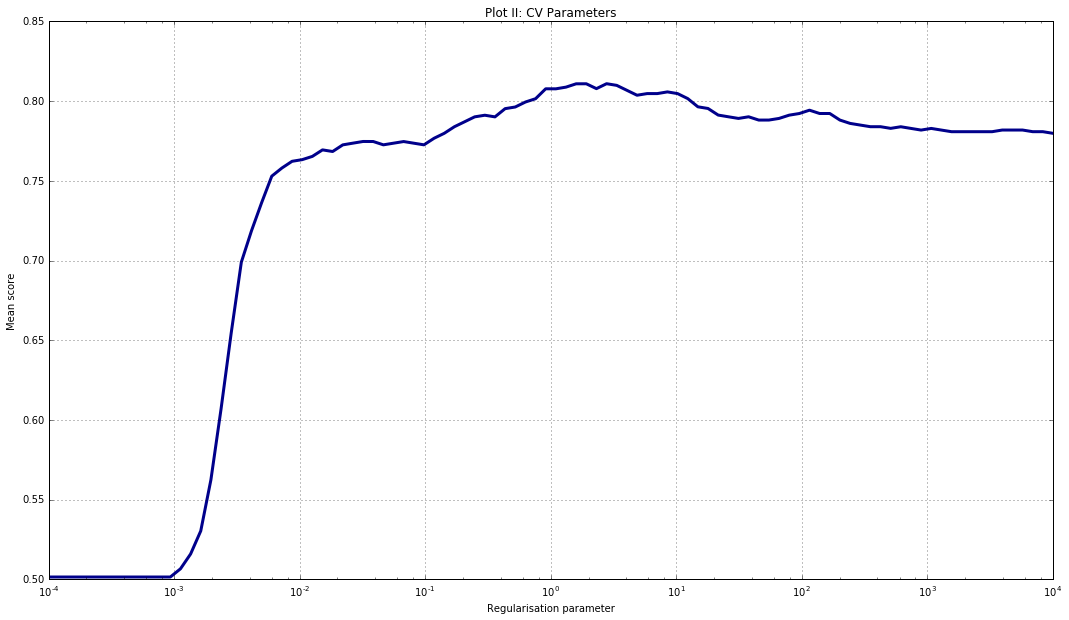

In [21]:
# Plotting
plt.figure(figsize=(18, 10))
plt.semilogx(logitm_cv.Cs_, mean_score, color='darkblue', linewidth=3)
plt.title('Plot II: CV Parameters')
plt.xlabel('Regularisation parameter'); plt.ylabel('Mean score')
plt.grid()

The above cross validation plot shows, that for very small values of the regularisation parameter, the penalty leads to a random, i.e., 50/50 model. That means, that the model performes like chance. With a bigger regularisation parameter the penalty goes lower and the score gets better up to a point and then goes down again. This effect occurs because of overfitting. 

In [22]:
# Find the optimal c-value (regularisation parameter) 
print 'Optimal c-value: ', logitm_cv.C_[0]
print 'Mean score: ', max(mean_score)


Optimal c-value:  2.78255940221
Mean score:  0.810965442878


The optimal c-value is around 2.78 while that gives a mean score of 0.81 on the training data. Those values can now be used to build the logistic regression model.

In [23]:
# Build logistic model with the above c-value
logitm_model = LogReg(C = logitm_cv.C_[0], penalty = "l2")
logitm_model.fit(x_train, y_train)

LogisticRegression(C=2.7825594022071258, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## 5. Analysis:

After the model parameters have been determined, the next step is to make predictions on the testing set. 


In [1]:
# Predicting on the test set
y_pred = logitm_model.predict(x_test)

# Calculate the false negative and false positive scores
false_negative_indices = [i for i, x in enumerate(y_test) if ((y_pred[i] == 0) and (y_test[i] == 1))]
false_positive_indices = [i for i, x in enumerate(y_test) if ((y_pred[i] == 1) and (y_test[i] == 0))]

# Printing the output
print 'Accuracy of the model', logitm_model.score(x_test, y_test)
print 'Number of false positives', len(false_positive_indices)
print 'Number of false negatives', len(false_negative_indices)

NameError: name 'logitm_model' is not defined

The accuracy of the model can be estimated trough the percentage of correct predictions made on the test set i.e. the number of reviews for which the predicted sentiment matches the given sentiment. In addition, the number of false postives (model predicts postive, but actually negative) and false negatives (model predicts negative but actually postive) can be investigated. 

The accuracy of the trained model is around 80%, i.e. the model predicts, based on the text in the review, in 80 out of 100 cases the correct sentiment. In the set of false predictions (positives and negatives) the rate is equal indicating that the model doesn't have a bias towards making postive or negative predictions.

The next step is to interpret the model by looking at the coefficients. There is one coefficient for every occuring word. The model has high numbers for words which contribute to making a review positive, while having low numbers for words associated with negative reviews. 


In [25]:
# Negative words
sorted_coeff_indices = np.argsort(logitm_model.coef_)[0]
x_features = np.array(vectorizer.get_feature_names())
negative_words = x_features[sorted_coeff_indices[0:20]]

# Positive words
positive_words = x_features[sorted_coeff_indices[-20:]]

# Combine
df_pos_neg = pd.concat([pd.Series(positive_words), pd.Series(negative_words)], axis=1)
df_pos_neg.columns = ["Positive words", "Negative words"]

# Print
df_pos_neg

,Positive words,Negative words
0,wheel,transmission
1,excellent,broke
2,mileage,uncomfortable
3,regular,cost
4,trips,weeks
5,cargo,he
6,146s,problems
7,little,repair
8,snow,worst
9,am,then


The top 20 positive and top 20 negative words are shown above. From the positive words it can be seen that words like 'excellent', 'perfect', 'comfortable', 'love', etc. are correlated with a positive review while words like 'broke', 'uncomfortable', 'cost', 'bad', etc. are correlated with a negative review. 

## 6. Visualisation:

As a next step the confidence score for each article can be calculated and visualized. A histogram is a good form to do this. A confidence score smaller than 0 means, that the class = negative is predicted. On the other side a score smaller than zero leads to a positive prediction.

In [26]:
# Confidence scores for negatives
y_test_neg_prob = logitm_model.decision_function(x_test[y_test==0, :])

# Confidence scores for positives
y_test_pos_prob = logitm_model.decision_function(x_test[y_test==1,:])

# Normal mu and se
(mu_pos, sigma_pos) = norm.fit(y_test_pos_prob)
(mu_neg, sigma_neg) = norm.fit(y_test_neg_prob)


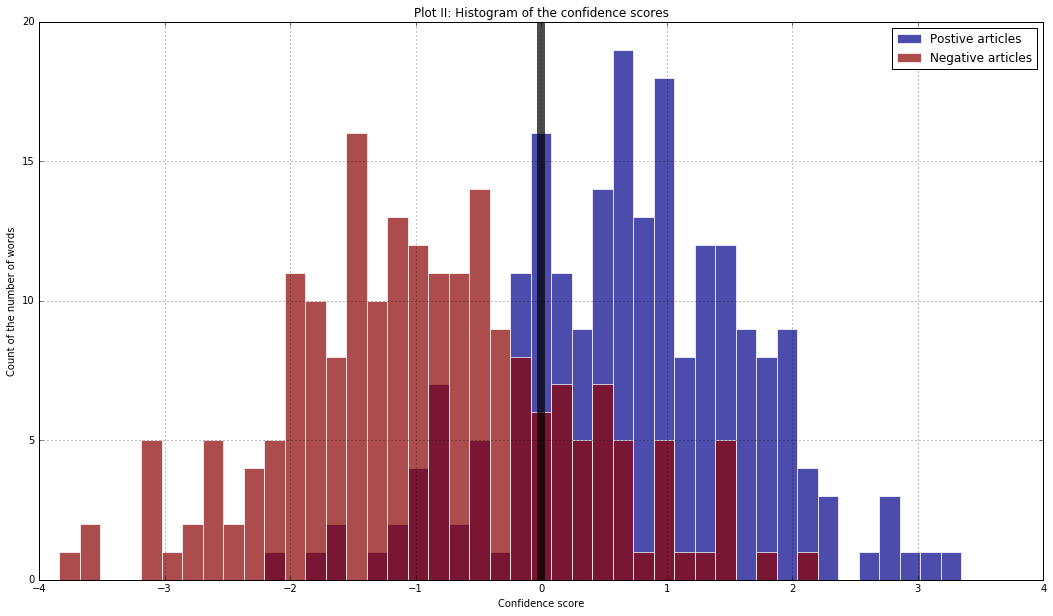

In [27]:
# Plotting
bins = np.linspace(-4, 4, 50) # Create bins
plt.figure(figsize=(18, 10))
plt.hist(y_test_pos_prob, bins, alpha=0.7, color='darkblue', edgecolor="white", label='Postive articles')
plt.hist(y_test_neg_prob, bins, alpha=0.7, color='darkred', edgecolor="white", label='Negative articles')
plt.axvline(x=0, linewidth=8, color='black', alpha = 0.7)
plt.title('Plot II: Histogram of the confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Count of the number of words')
plt.legend(loc='best')
plt.grid()
plt.show()


The above plot of the confidence scores shows, that many positively tagged reviews (in blue) have a confidence score less than 0 indicating that they have been incorrectly classified by the model because they are negative. Vice versa is also occuring for the negative reviews. This explains the number of incorrect classifications.


## 6. Conclusion

The logistic regression model is able to predict the sentiment of a review with an accuracy of almost 80 percent. Nevertheless, the analysis above showes that there is still room for improvement. This could be achieved trough further preprocessing of the text. 

## Challenge Problem: Automated Medical Diagnosis

In this problem, you are going to build a model to diagnose heart disease. 

The training set is provided in the file ``dataset_3_train.txt`` and there are two test sets: ``dataset_3_test_1.txt`` and ``dataset_3_test_2.txt``. Each patient in the datasets is described by 5 biomarkers extracted from cardiac SPECT images; the last column in each dataset contains the disease diagnosis (1 indicates that the patient is normal, and 0 indicates that the patient suffers from heart disease).

- Fit a logistic regression model to the training set, and report its accuracy on both the test sets. 


- Is your accuracy rate meaningful or reliable? How comfortable would you be in using your predictions to diagnose real living patients? Justify your answers. 

  (**Hint:** How does the performance of your model compare with a classifier that lumps all patients into the same class?)


- Let's call the logistic regression model you learned, ${C}_1$. Your colleague suggests that you can get higher accuracies for this task by using a threshold of 0.05 on the Logistic regression model to predict labels instead of the usual threshold of 0.5, i.e. use a classifier that predicts 1 when $\widehat{P}(Y = 1\,|\, X) \geq 0.05$ and 0 otherwise. Let's call this classifier ${C}_2$. Does ${C}_2$ perform better the two test sets - that is, which one would you rather use for automated diagnostics? Support your conclusion with careful analysis. 


- Generalize your analysis of these two classifiers. Under what general conditions does $C_2$ perform better than ${C}_1$? Support your conclusion with a mathematical proof or simulation


**Hint:** You were told in class that a classifier that predicts 1 when $\widehat{P}(Y = 1 \,|\, X) \geq 0.5$, and 0 otherwise, is the Bayes classifier. This classifier minimizes the classification error rate. What can you say about a classifier that uses a threshold other than $0.5$? Is it the Bayes classifier for a different loss function?


**Hint:** For the first three parts, you might find it useful to analyze the conditional accuracy on each class.

## Functions (necessary for the following calculations)

In [28]:
#--------  evaluate_test_set
# A function to evaluate the test set with a 0.05 threshold
# requires
#      numpy
# Input: 
#      x_test_1 (test var)
#      y_test_1 (y var)
#      prob (probabilty threshold)
def evaluate_test_set(x_test_1, y_test_1, prob = 0.05):
    
    y_test_1_prob = logitm.predict_proba(x_test_1)[:, 1]
    y_pred = np.zeros((len(y_test_1), 1)).reshape(-1)
    y_pred[y_test_1_prob > prob] = 1
    
    # Calculate values
    false_negatives = [i for i,x in enumerate(y_pred) if (y_pred[i] == 1 and y_test_1[i] == 0)]
    false_positives = [i for i,x in enumerate(y_pred) if (y_pred[i] == 0 and y_test_1[i] == 1)]
    
    # Printing
    print 'Accuracy', np.mean(y_pred==y_test_1)
    print 'Accuracy for class 0', np.mean((y_pred == y_test_1)[y_test_1==0])
    print 'Accuracy for class 1', np.mean((y_pred == y_test_1)[y_test_1==1])
    print '\nFalse positives', len(false_positives)
    print 'False negatives', len(false_negatives)

#--------  plot_values
# A function to plot the values with the different thresholds
# requires
#      numpy
#      mathplotlib
# Input: 
#      x_test_1 (test var)
#      y_test_1 (y var)
#      label (label values)
def plot_values(y_test_1, x_test_1, label):
    # Setup
    threshold = np.linspace(0, 1, 50)
    false_positive_rate = []
    true_positive_rate = []
    accuracy = []
    error_rate = []
    num_patients = len(y_test_1)
    y_test_1_prob = logitm.predict_proba(x_test_1)[:, 1]
    positives = len(y_test_1[y_test_1 == 0])
    negatives = len(y_test_1[y_test_1 == 1])

    # Iterating
    for prob in threshold:
        y_test_1_prob = logitm.predict_proba(x_test_1)[:, 1]
        y_pred = np.zeros((len(y_test_1), 1)).reshape(-1)
        y_pred[y_test_1_prob > prob] = 1

        accuracy.append(np.mean(y_pred==y_test_1))
        false_negatives = [i for i,x in enumerate(y_pred) if (y_pred[i] == 1 and y_test_1[i] == 0)]
        true_positives = [i for i,x in enumerate(y_pred) if (y_pred[i] == 0 and y_test_1[i] == 0)]
        false_positives = [i for i,x in enumerate(y_pred) if (y_pred[i] == 0 and y_test_1[i] == 1)]
        err_rate = len(false_negatives)/float(positives)
        true_pos_rate = (len(true_positives))/float(positives)
        false_pos = len(false_positives)/float(negatives)
        false_positive_rate.append(false_pos)
        true_positive_rate.append(true_pos_rate)
        error_rate.append(err_rate)
    
    # Ploting
    plt.figure(figsize=(18, 6))
    plt.plot(threshold, error_rate, label='False negative rate', linewidth=3, color="darkred", alpha = 0.7)
    plt.plot(threshold, true_positive_rate, label='True positive rate', linewidth=3, color="darkblue", alpha = 0.7)
    plt.plot(threshold, false_positive_rate, label='False positive rate', linewidth=3, color="black", alpha = 0.7)
    plt.legend(loc='best')
    plt.xlabel('Threshold probability'); plt.ylabel('Rate')
    plt.title(label)
    plt.grid()
    plt.show()


## 1: Importing Data

In [29]:
# Import the dataframes (with the 5 biomarkers)
df_train = pd.read_csv('datasets/dataset_3_train.txt', index_col=False, names=['1', '2', '3', '4', '5', 'y'], delimiter=',', header=0)
df_test_1 = pd.read_csv('datasets/dataset_3_test_1.txt', names=['1', '2', '3', '4', '5', 'y'], delimiter=',', header=0)
df_test_2 = pd.read_csv('datasets/dataset_3_test_2.txt', names=['1', '2', '3', '4', '5', 'y'], delimiter=',', header=0)


In [30]:
# Show the data
df_train.head()

,1,2,3,4,5,y
0,73.0,73.0,75.0,79.0,64.0,0.0
1,62.0,56.0,66.0,57.0,74.0,0.0
2,40.0,73.0,61.0,74.0,61.0,0.0
3,68.0,58.0,76.0,71.0,64.0,0.0
4,70.0,54.0,66.0,66.0,76.0,0.0


## 2: Data exploration

In [31]:
print 'Number of patients without a heart disease: ', len(df_train[df_train['y'] == 1])
print 'Number of patients with a heart disease: ', len(df_train[df_train['y'] == 0])

Number of patients without a heart disease:  8
Number of patients with a heart disease:  147


The first look at the data shows that most of the patients have a heart disease (147) while 8 patients have no heart disease. 

In [32]:
df_x_train = df_train[['1', '2', '3', '4', '5']]
df_y_train = df_train['y']

## 3: Cleaning the data

In [33]:
# Create testing and training set (70% Train, 30% Test)
np.random.seed(456) # Set random seed
x_train, x_test, y_train, y_test = train_test_split(df_x_train, df_y_train, train_size=0.7)

In [34]:
# Print training set
print 'Number of patients in the training set: ', x_train.shape[0]
print 'Number of patients with heart disease: ', len(y_train[y_train==0])
print 'Number of patients without heart disease: ', len(y_train[y_train==1])


Number of patients in the training set:  108
Number of patients with heart disease:  102
Number of patients without heart disease:  6


In [35]:
# Print test set
print 'Number of patients in the testing set: ', x_test.shape[0]
print 'Number of patients with heart disease: ', len(y_test[y_test==0])
print 'Number of patients without heart disease: ', len(y_test[y_test==1])


Number of patients in the testing set:  47
Number of patients with heart disease:  45
Number of patients without heart disease:  2


## 4.  Modelling

In [36]:
# Empty arrays
Cs = []
score = []

# Crossvalidation
for c in np.linspace(-4, 4, 100):
    C = 1/float(10**c)
    logitm = LogReg(C = C, penalty = "l2")
    logitm.fit(x_train, y_train)
    Cs.append(C)
    s = logitm.score(x_test, y_test)
    score.append(s)


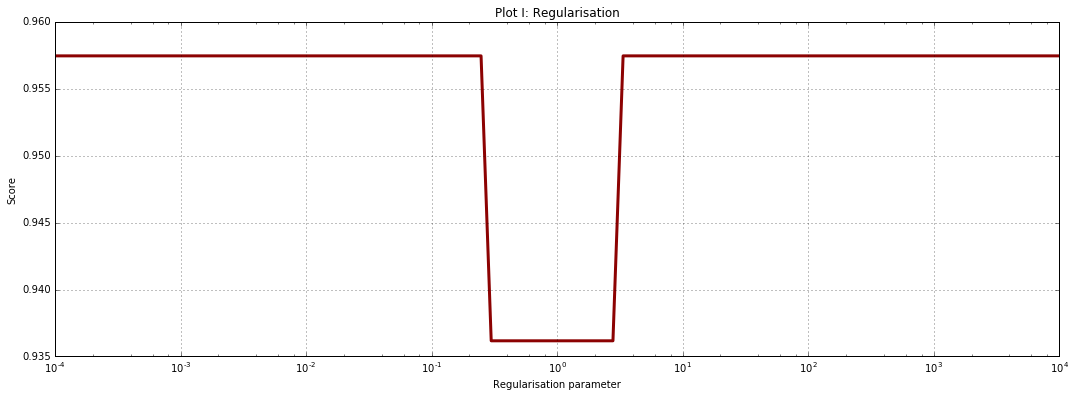

In [37]:
# Plotting
plt.figure(figsize=(18, 6))
plt.title('Plot I: Regularisation')
plt.semilogx(Cs, score, color='darkred', alpha=3, linewidth=3)
plt.xlabel('Regularisation parameter'); plt.ylabel('Score')
plt.grid()
plt.show()


The plot above inticates that there is some issue with overfitting, i.e., around zero the model starts overfitting. 


In [38]:
# Testing the model on the test set
x_test_1 = df_test_1[['1', '2', '3', '4', '5']]
y_test_1 = df_test_1['y']
x_test_2 = df_test_2[['1', '2', '3', '4', '5']]
y_test_2 = df_test_2['y']

In [47]:
# Printing test set 1
print 'Number of patients in the test data (1): ', x_test_1.shape[0]
print 'Number of patients with heart disease: ', len(y_test_1[y_test_1==0])
print 'Number of patients without heart disease: ', len(y_test_1[y_test_1==1])

Number of patients in the test set 1:  66
Number of patients with heart disease:  62
Number of patients without heart disease:  4


In [49]:
# Printing test set 2
print 'Number of patients in the test data (2): ', x_test_2.shape[0]
print 'Number of patients with heart disease: ', len(y_test_2[y_test_2==0])
print 'Number of patients without heart disease: ', len(y_test_2[y_test_2==1])

Number of patients in the test data (2):  93
Number of patients with heart disease:  46
Number of patients without heart disease:  47


In [41]:
# Model data with c=100 (see plot for justification)
logitm = LogReg(C=100)
logitm.fit(x_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
# Scoring
score_test_1 = logitm.score(x_test_1, y_test_1)
score_test_2 = logitm.score(x_test_2, y_test_2)

In [43]:
# Scores for test set 1
print 'Test 1:'
print 'Accuracy', score_test_1

# Scores for test set 2
print '\nTest 2:'
print 'Accuracy', score_test_2


Test 1:
Accuracy 0.939393939394

Test 2:
Accuracy 0.494623655914


The score for the test set nr. 1 is with 94% quit high, however, for test set 2 it is only 49%. The reason for this is, that the overall distribution of patients in the test set 1 is very similar to the training set (see statistics above). The score for the model is high because there are not a lot of pations without a heart desease. That means, that the model is biased to predict that the patient has the disease (class 0) and for most of the patients in this set, the prediction will be correct.

However, test set 2 is approximately evenly distributed between patients with the disease and without the disease. The score of applying the model to this set is very low (50%). The model will predict that all patients have the disease and 50% of the time it will be correct. That means the model is no better than 50/50 and the accuracy measurment is not a reliable measurment.

## 5: New model with a smaller probability threshold (0.05):

- Let's call the logistic regression model you learned, ${C}_1$. Your colleague suggests that you can get higher accuracies for this task by using a threshold of 0.05 on the Logistic regression model to predict labels instead of the usual threshold of 0.5, i.e. use a classifier that predicts 1 when $\widehat{P}(Y = 1\,|\, X) \geq 0.05$ and 0 otherwise. Let's call this classifier ${C}_2$. Does ${C}_2$ perform better the two test sets - that is, which one would you rather use for automated diagnostics? Support your conclusion with careful analysis. 


In [44]:
# Scores for test set 1
print 'Test 1:'
evaluate_test_set(x_test_1, y_test_1)

# Scores for test set 2
print '\nTest 2:'
evaluate_test_set(x_test_2, y_test_2)


Test 1:
Accuracy 0.5
Accuracy for class 0 0.5
Accuracy for class 1 0.5

False positives 2
False negatives 31

Test 2:
Accuracy 0.548387096774
Accuracy for class 0 0.434782608696
Accuracy for class 1 0.659574468085

False positives 16
False negatives 26


Putting the probabilty threshold to 0.05, the overall accuracy of the classifier has decreased for test set 1 and 2. The number of false negatives has increased and the number of false positives decreased.

There is a big cost associated with the wrong classification of patients with heart disease. That means that the cost of misclassifying a patient as not having the disease is greater than the cost of classifying it as as having the disease while not having it. This in turn means that the threshold level should favour the act of over predicting class zero. 


## 6. Simulation

- Generalize your analysis of these two classifiers. Under what general conditions does $C_2$ perform better than ${C}_1$? Support your conclusion with a mathematical proof or simulation

The effect of the threshold levels can be analysed trough a simulation where the threshold probability is varied between 0 and 1.

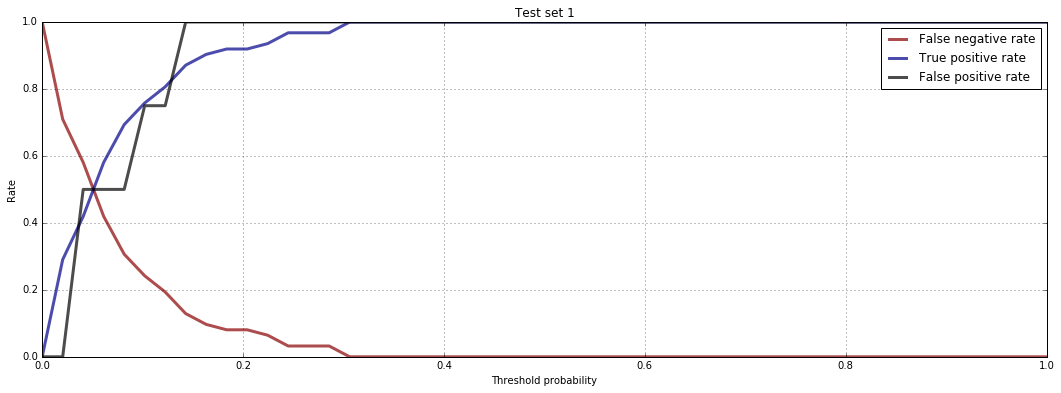

In [45]:
# Plot for set 1
plot_values(y_test_1, x_test_1, 'Test set 1')

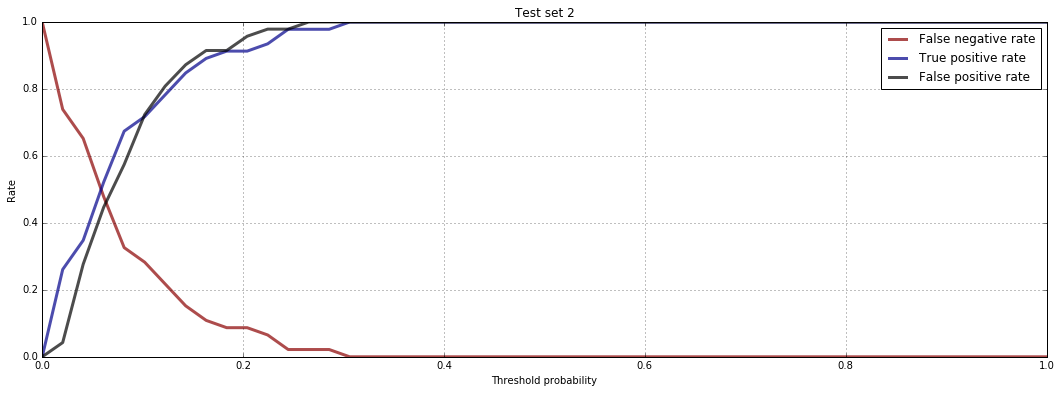

In [46]:
# Plot for set 2
plot_values(y_test_2, x_test_2, 'Test set 2')

The Bayes classifier on the threshold of 0.5 is minimizing the overall classification error rate. However, this only occurs when the dataset has an even distribution among the different classes and the features are well seperated. If the classes are unevenly distributioned the Bayes classifier is a poor indicator. In this case, the intersection of the false positive, true positive and false negative rates occurs at a threshold probability of 0.05. 